In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
#!pip install catboost
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [5]:
data = pd.read_csv('baseball.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15051 entries, 0 to 15050
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AVG     15051 non-null  float64
 1   G       15051 non-null  int64  
 2   R       15051 non-null  int64  
 3   H       15051 non-null  int64  
 4   2B      15051 non-null  int64  
 5   3B      15051 non-null  int64  
 6   HR      15051 non-null  int64  
 7   TB      15051 non-null  int64  
 8   RBI     15051 non-null  int64  
 9   SB      15051 non-null  int64  
 10  BB      15051 non-null  int64  
 11  HBP     15051 non-null  int64  
 12  SO      15051 non-null  int64  
 13  GDP     15051 non-null  float64
 14  age     15051 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.7 MB


In [ ]:
data.describe()

,AVG,G,R,H,2B,3B,HR,TB,RBI,SB,BB,HBP,SO,GDP,age
count,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000
mean,0.204713,61.880739,20.581689,42.419241,7.058800,0.886851,4.311939,64.187562,19.595376,3.804863,15.222842,1.637167,26.913893,0.936679,27.212345
std,0.119792,44.268883,24.802789,48.330860,8.701331,1.612169,7.477854,76.770437,25.288249,7.713775,19.633987,2.727582,28.536340,2.484314,4.802694
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,0.150000,21.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.200000,24.000000
50%,0.229000,54.000000,9.000000,19.000000,3.000000,0.000000,1.000000,27.000000,8.000000,1.000000,6.000000,0.000000,17.000000,0.290000,27.000000
75%,0.271000,104.000000,34.000000,77.000000,12.000000,1.000000,5.000000,111.000000,31.000000,4.000000,24.000000,2.000000,42.000000,0.348000,31.000000
max,1.000000,154.000000,137.000000,216.000000,52.000000,16.000000,56.000000,374.000000,146.000000,106.000000,127.000000,31.000000,204.000000,24.000000,48.000000


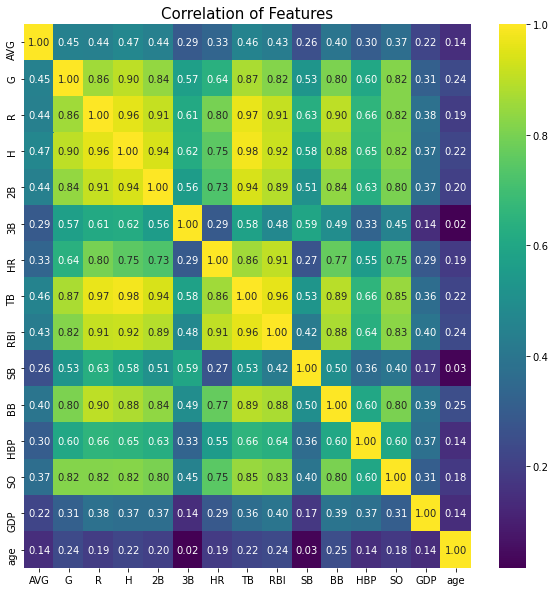

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Correlation of Features', size = 15)
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'viridis')
plt.show()

***
## Making the Features for Modeling

In [184]:
X = data.iloc[:, :-1]
y = data.age

In [185]:
scaler = MinMaxScaler()

In [186]:
X = scaler.fit_transform(X)

In [187]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

***
## ML Models for tabular data

In [188]:
cb = CatBoostRegressor(random_state = 42, verbose = 0)
rf = RandomForestRegressor(random_state = 42)
lgbm = LGBMRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
svr = SVR()
knn = KNeighborsRegressor()
ls = Lasso()
rg = Ridge()
lr = LinearRegression()
esn = ElasticNet()

In [189]:
models = [cb, rf, lgbm, xgb, svr, knn, ls, rg, lr, esn]

In [190]:
scores = []
for model in models :
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, val_pred) ** 0.5
    print(f'{model.__class__.__name__}의 RMSE = {round(rmse, 3)}')
    scores.append(rmse)

CatBoostRegressor의 RMSE = 4.361
RandomForestRegressor의 RMSE = 4.47
LGBMRegressor의 RMSE = 4.386
[12:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor의 RMSE = 4.387
SVR의 RMSE = 4.392
KNeighborsRegressor의 RMSE = 4.775
Lasso의 RMSE = 4.812
Ridge의 RMSE = 4.576
LinearRegression의 RMSE = 4.576
ElasticNet의 RMSE = 4.812


***
## Pytorch

In [164]:
X_train = torch.tensor(X_train, dtype = torch.float32)
X_val = torch.tensor(X_val, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
y_val = torch.tensor(np.array(y_val), dtype = torch.float32)

In [165]:
DS = TensorDataset(X_train, y_train)

In [166]:
loader = DataLoader(DS, batch_size = 64, shuffle = True)

In [167]:
net = nn.Sequential(
    nn.Linear(X.shape[1], 16, bias = False),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(16, 8, bias = False),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [168]:
optimizer = optim.Adam(net.parameters(), lr = 0.05)

In [169]:
loss_fn = nn.MSELoss()

In [170]:
tr_losses = []
te_losses = []

In [171]:
for epoch in range(200) :
  running_loss = 0
  for i, (xx, yy) in enumerate(loader) :
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item() ** 0.5
  tr_losses.append(running_loss / i)
  y_pred = net(X_val)
  te_loss = loss_fn(y_pred, y_val)
  te_losses.append(te_loss.item() ** 0.5)

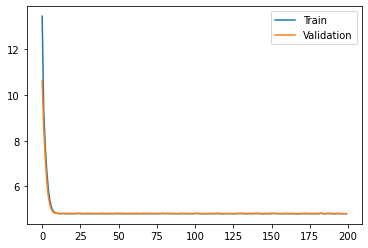

In [172]:
plt.plot(tr_losses, label = "Train")
plt.plot(te_losses, label = "Validation")
plt.legend()
plt.show()

In [173]:
pred = net(X_val).detach().numpy()

In [174]:
rmse = mean_squared_error(y_val, pred) ** 0.5

***
## RMSE of Each Model

In [191]:
score_df = pd.DataFrame({'MODEL' : [model.__class__.__name__ for model in models], 'RMSE' : scores})

In [194]:
score_df.loc[11] = ['NN', rmse]
score_df = score_df.sort_values(by = 'RMSE')

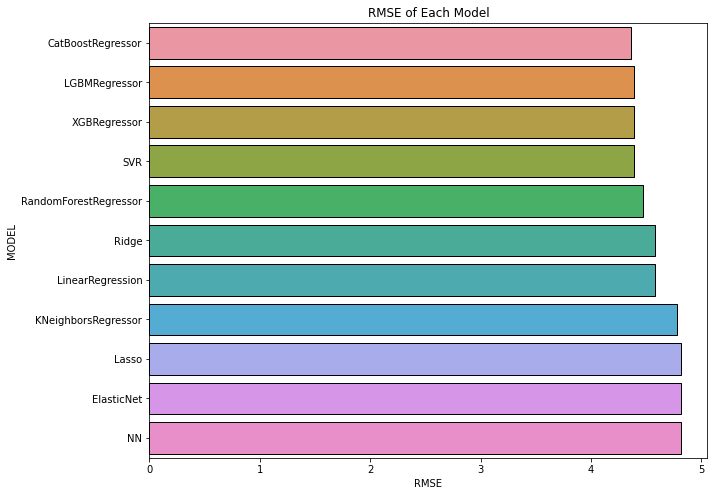

In [195]:
plt.figure(figsize = (10, 8))
plt.title('RMSE of Each Model')
sns.barplot(y = score_df.MODEL, x = score_df.RMSE, edgecolor = (0, 0, 0))
plt.show()